In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, classification_report


In [2]:
# Load dataset into DataFrame
file_path = 'high_popularity_spotify_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
print(df.head())


   energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  instrumentalness  \
0  Lady Gaga, Bruno Mars               3       0.0304  ...            0.0000   
1          Billie Eilish               4       0.0358  ...            0.0608   
2          Gracie Abrams               4       0.0368  ...            0.0000   
3      Sabrina Carpenter               4       0.0634  ...            0.0000   
4       ROSÉ, Bruno Mars               4       0.2600  ...            0.0000   

           track_album_id mode key dur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1681 non-null   float64
 1   tempo                     1681 non-null   float64
 2   danceability              1681 non-null   float64
 3   playlist_genre            1681 non-null   object 
 4   loudness                  1681 non-null   float64
 5   liveness                  1681 non-null   float64
 6   valence                   1681 non-null   float64
 7   track_artist              1681 non-null   object 
 8   time_signature            1681 non-null   int64  
 9   speechiness               1681 non-null   float64
 10  track_popularity          1681 non-null   int64  
 11  track_href                1681 non-null   object 
 12  uri                       1681 non-null   object 
 13  track_album_name          1680 non-null   object 
 14  playlist

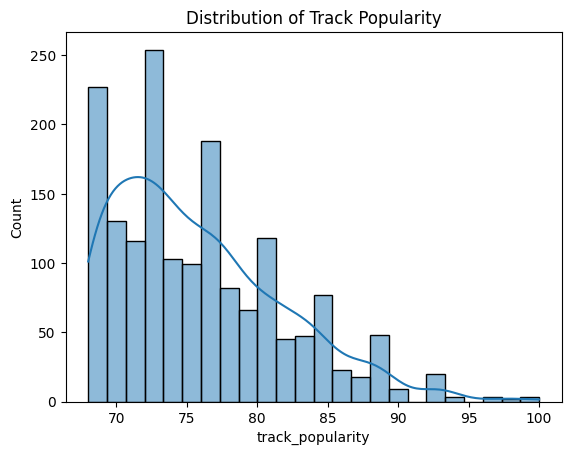

In [4]:
# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Visualize distribution of track popularity
sns.histplot(df['track_popularity'], kde=True)
plt.title("Distribution of Track Popularity")
plt.show()



In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['playlist_genre'] = label_encoder.fit_transform(df['playlist_genre'])

# Normalize numerical columns
scaler = StandardScaler()
num_cols = ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [7]:
# Train-test split
X = df[num_cols + ['playlist_genre']]
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
# Evaluate model
y_pred = regressor.predict(X_test)
# Calculate RMSE without the 'squared' argument if it's not supported
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE
print("RMSE:", rmse)


RMSE: 4.8522137833064


RMSE: 4.558549732936539


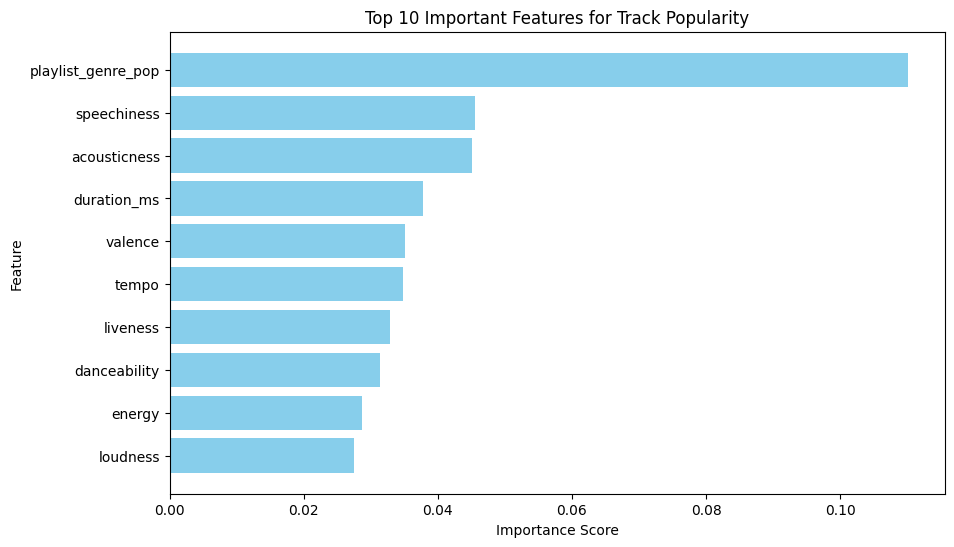


Top 10 Important Features:
               Feature  Importance
32  playlist_genre_pop    0.110074
7          speechiness    0.045601
12        acousticness    0.045068
11         duration_ms    0.037823
5              valence    0.035159
1                tempo    0.034789
4             liveness    0.032846
2         danceability    0.031407
0               energy    0.028672
3             loudness    0.027486


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate model
y_pred = regressor.predict(X_test)
# Calculate MSE first, then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE
print(f"RMSE: {rmse}")

# Get feature importances
importances = regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get top 10 important features
top_10_features = importance_df.head(10)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Track Popularity')
plt.gca().invert_yaxis()
plt.show()

# Print top 10 features
print("\nTop 10 Important Features:")
print(top_10_features)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train-test split
X = df[num_cols + ['playlist_genre']]
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate model on training data
y_train_pred = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate model on testing data
y_test_pred = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Data:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)

print("\nTesting Data:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test)

Training Data:
MSE: 4.018121138185334
RMSE: 2.004525165266162
R-squared: 0.8930181907202629

Testing Data:
MSE: 23.54397859890861
RMSE: 4.8522137833064
R-squared: 0.2616713390706832


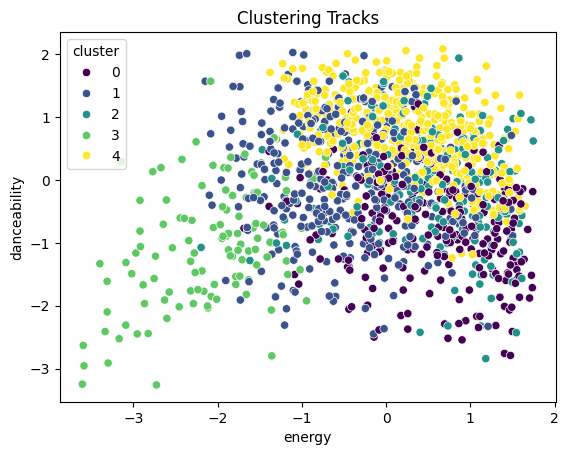

In [9]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df[num_cols])

# Add cluster labels to dataset
df['cluster'] = clusters

# Visualize clusters
sns.scatterplot(data=df, x='energy', y='danceability', hue='cluster', palette='viridis')
plt.title("Clustering Tracks")
plt.show()


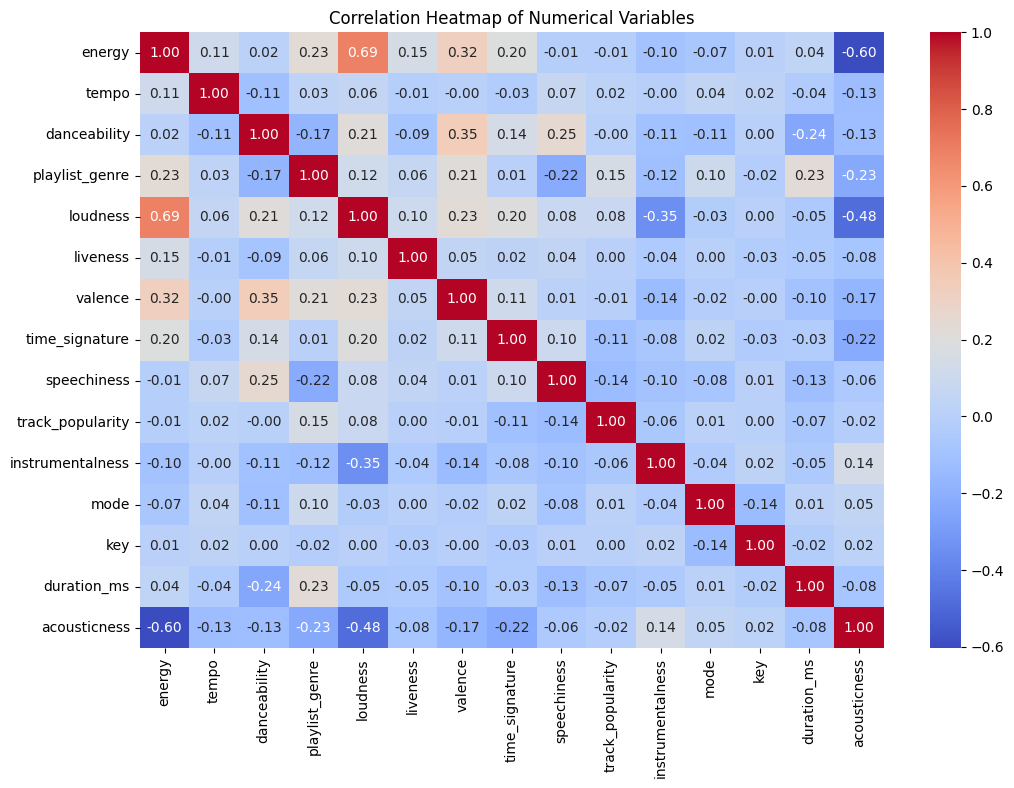

In [10]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


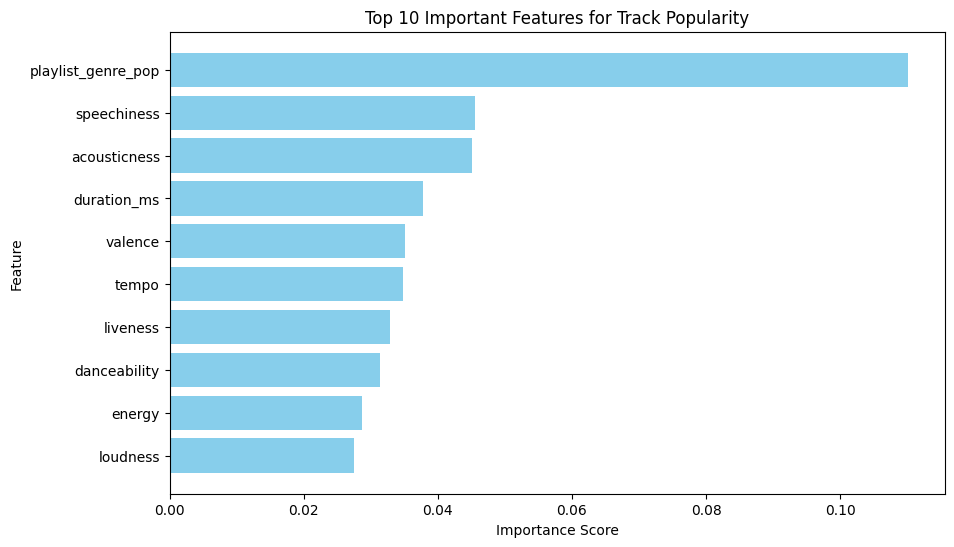

               Feature  Importance
32  playlist_genre_pop    0.110074
7          speechiness    0.045601
12        acousticness    0.045068
11         duration_ms    0.037823
5              valence    0.035159
1                tempo    0.034789
4             liveness    0.032846
2         danceability    0.031407
0               energy    0.028672
3             loudness    0.027486


In [13]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
file_path = 'high_popularity_spotify_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Select features and target variable
target = 'track_popularity'
features = [col for col in df.columns if col != target]

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update features list after one-hot encoding
features = [col for col in df.columns if col != target] # This line updates the features list to include the new columns created by pd.get_dummies and exclude the target variable

# Split dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get top 10 important features
top_10_features = importance_df.head(10)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Track Popularity')
plt.gca().invert_yaxis()
plt.show()

# Print top 10 features
print(top_10_features)


In [17]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = 'high_popularity_spotify_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Ensure 'track_name' column is cleaned
df['track_name'] = df['track_name'].fillna('').str.lower()

# Use TF-IDF Vectorizer to encode track names
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['track_name'])

# Compute cosine similarity between tracks
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get track recommendations
def recommend_tracks(track_name, cosine_sim=cosine_sim, df=df, top_n=5):
    """
    Recommends tracks based on cosine similarity of track names.

    Args:
        track_name (str): The name of the track to base recommendations on.
        cosine_sim (numpy.ndarray): Precomputed cosine similarity matrix.
        df (pd.DataFrame): DataFrame containing track information.
        top_n (int): Number of recommendations to return.

    Returns:
        pd.DataFrame: DataFrame containing recommended tracks.
    """
    # Ensure case-insensitivity
    track_name = track_name.lower()

    # Find the index of the track in the DataFrame
    if track_name not in df['track_name'].values:
        return f"Track '{track_name}' not found in the dataset."

    idx = df[df['track_name'] == track_name].index[0]

    # Get similarity scores for all tracks
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top_n most similar tracks
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]  # Skip the first (itself)

    # Return the recommended tracks
    return df.iloc[sim_indices][['track_name', 'track_artist', 'track_popularity']]

# Example usage
track_to_search = "Good Luck, Babe!"  # Replace with any track name from the dataset
recommendations = recommend_tracks(track_to_search, top_n=5)

# Print recommendations
print(f"Recommendations for '{track_to_search}':")
print(recommendations)


Recommendations for 'Good Luck, Babe!':
            track_name                track_artist  track_popularity
457   good luck, babe!               Chappell Roan                94
687   good luck, babe!               Chappell Roan                94
1244        good to be                  Mark Ambor                71
1294         good love          Hannah Laing, RoRo                71
988          good time  Owl City, Carly Rae Jepsen                75


<ipython-input-20-a74e0b0eaf0c>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', infer_datetime_format=True)
<ipython-input-20-a74e0b0eaf0c>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', infer_datetime_format=True)


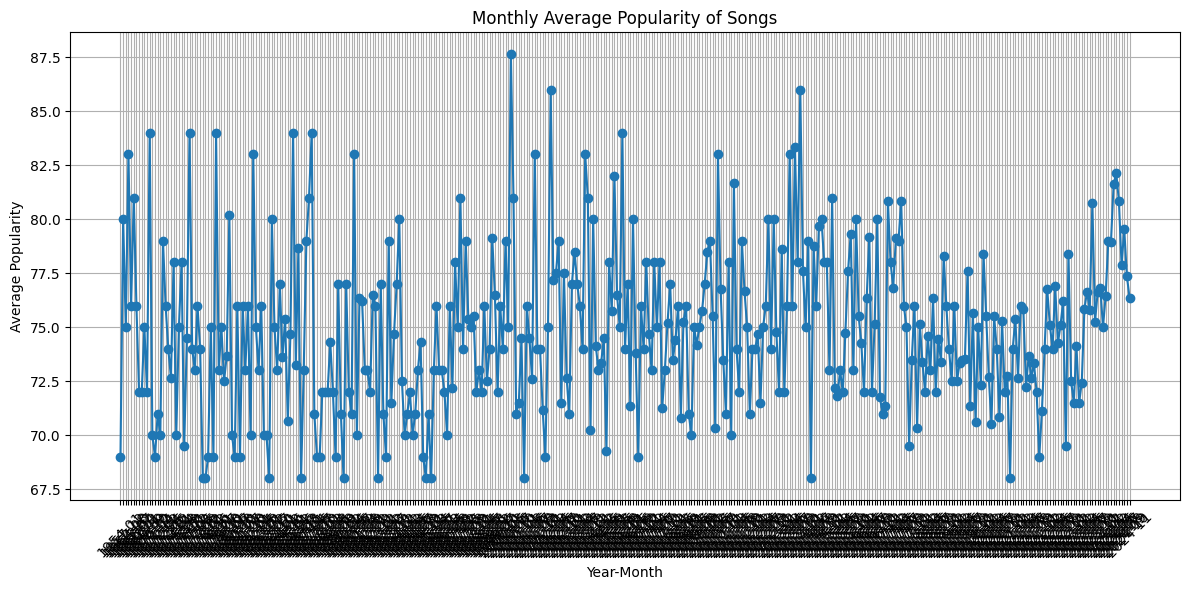

In [20]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'high_popularity_spotify_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Convert 'track_album_release_date' to datetime, handling errors and inferring format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', infer_datetime_format=True)

# Extract year and month
df['year_month'] = df['track_album_release_date'].dt.to_period('M')

# Calculate monthly average popularity
monthly_avg_popularity = df.groupby('year_month')['track_popularity'].mean().reset_index()

# Plot monthly average popularity
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_popularity['year_month'].astype(str), monthly_avg_popularity['track_popularity'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Average Popularity")
plt.title("Monthly Average Popularity of Songs")
plt.grid(True)
plt.tight_layout()
plt.show()



<ipython-input-22-6e43ff4de2c2>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_popularity = df['track_popularity'].resample('M').mean()


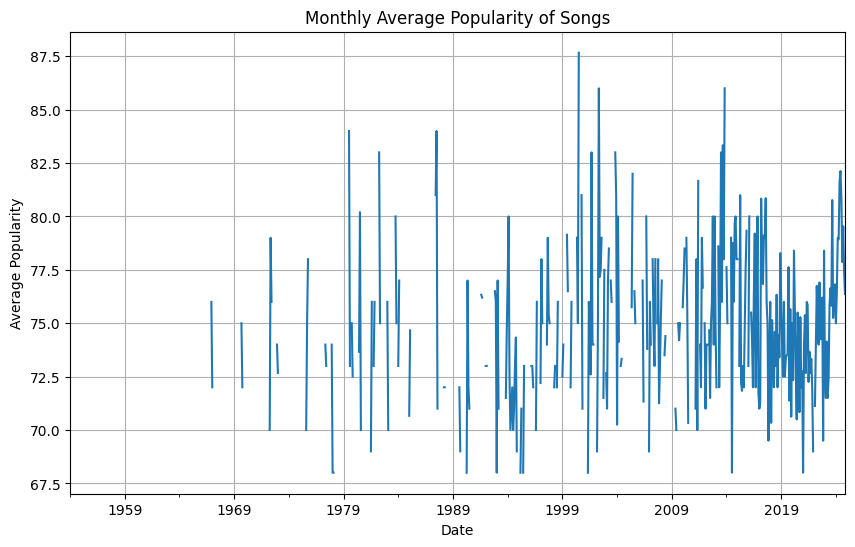

In [22]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce') # errors='coerce' handles invalid dates by setting them to NaT
df.set_index('track_album_release_date', inplace=True)

# Resample data by month and calculate average popularity
monthly_popularity = df['track_popularity'].resample('M').mean()

# Plot the monthly popularity trend
plt.figure(figsize=(10, 6))
monthly_popularity.plot()
plt.title('Monthly Average Popularity of Songs')
plt.xlabel('Date')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

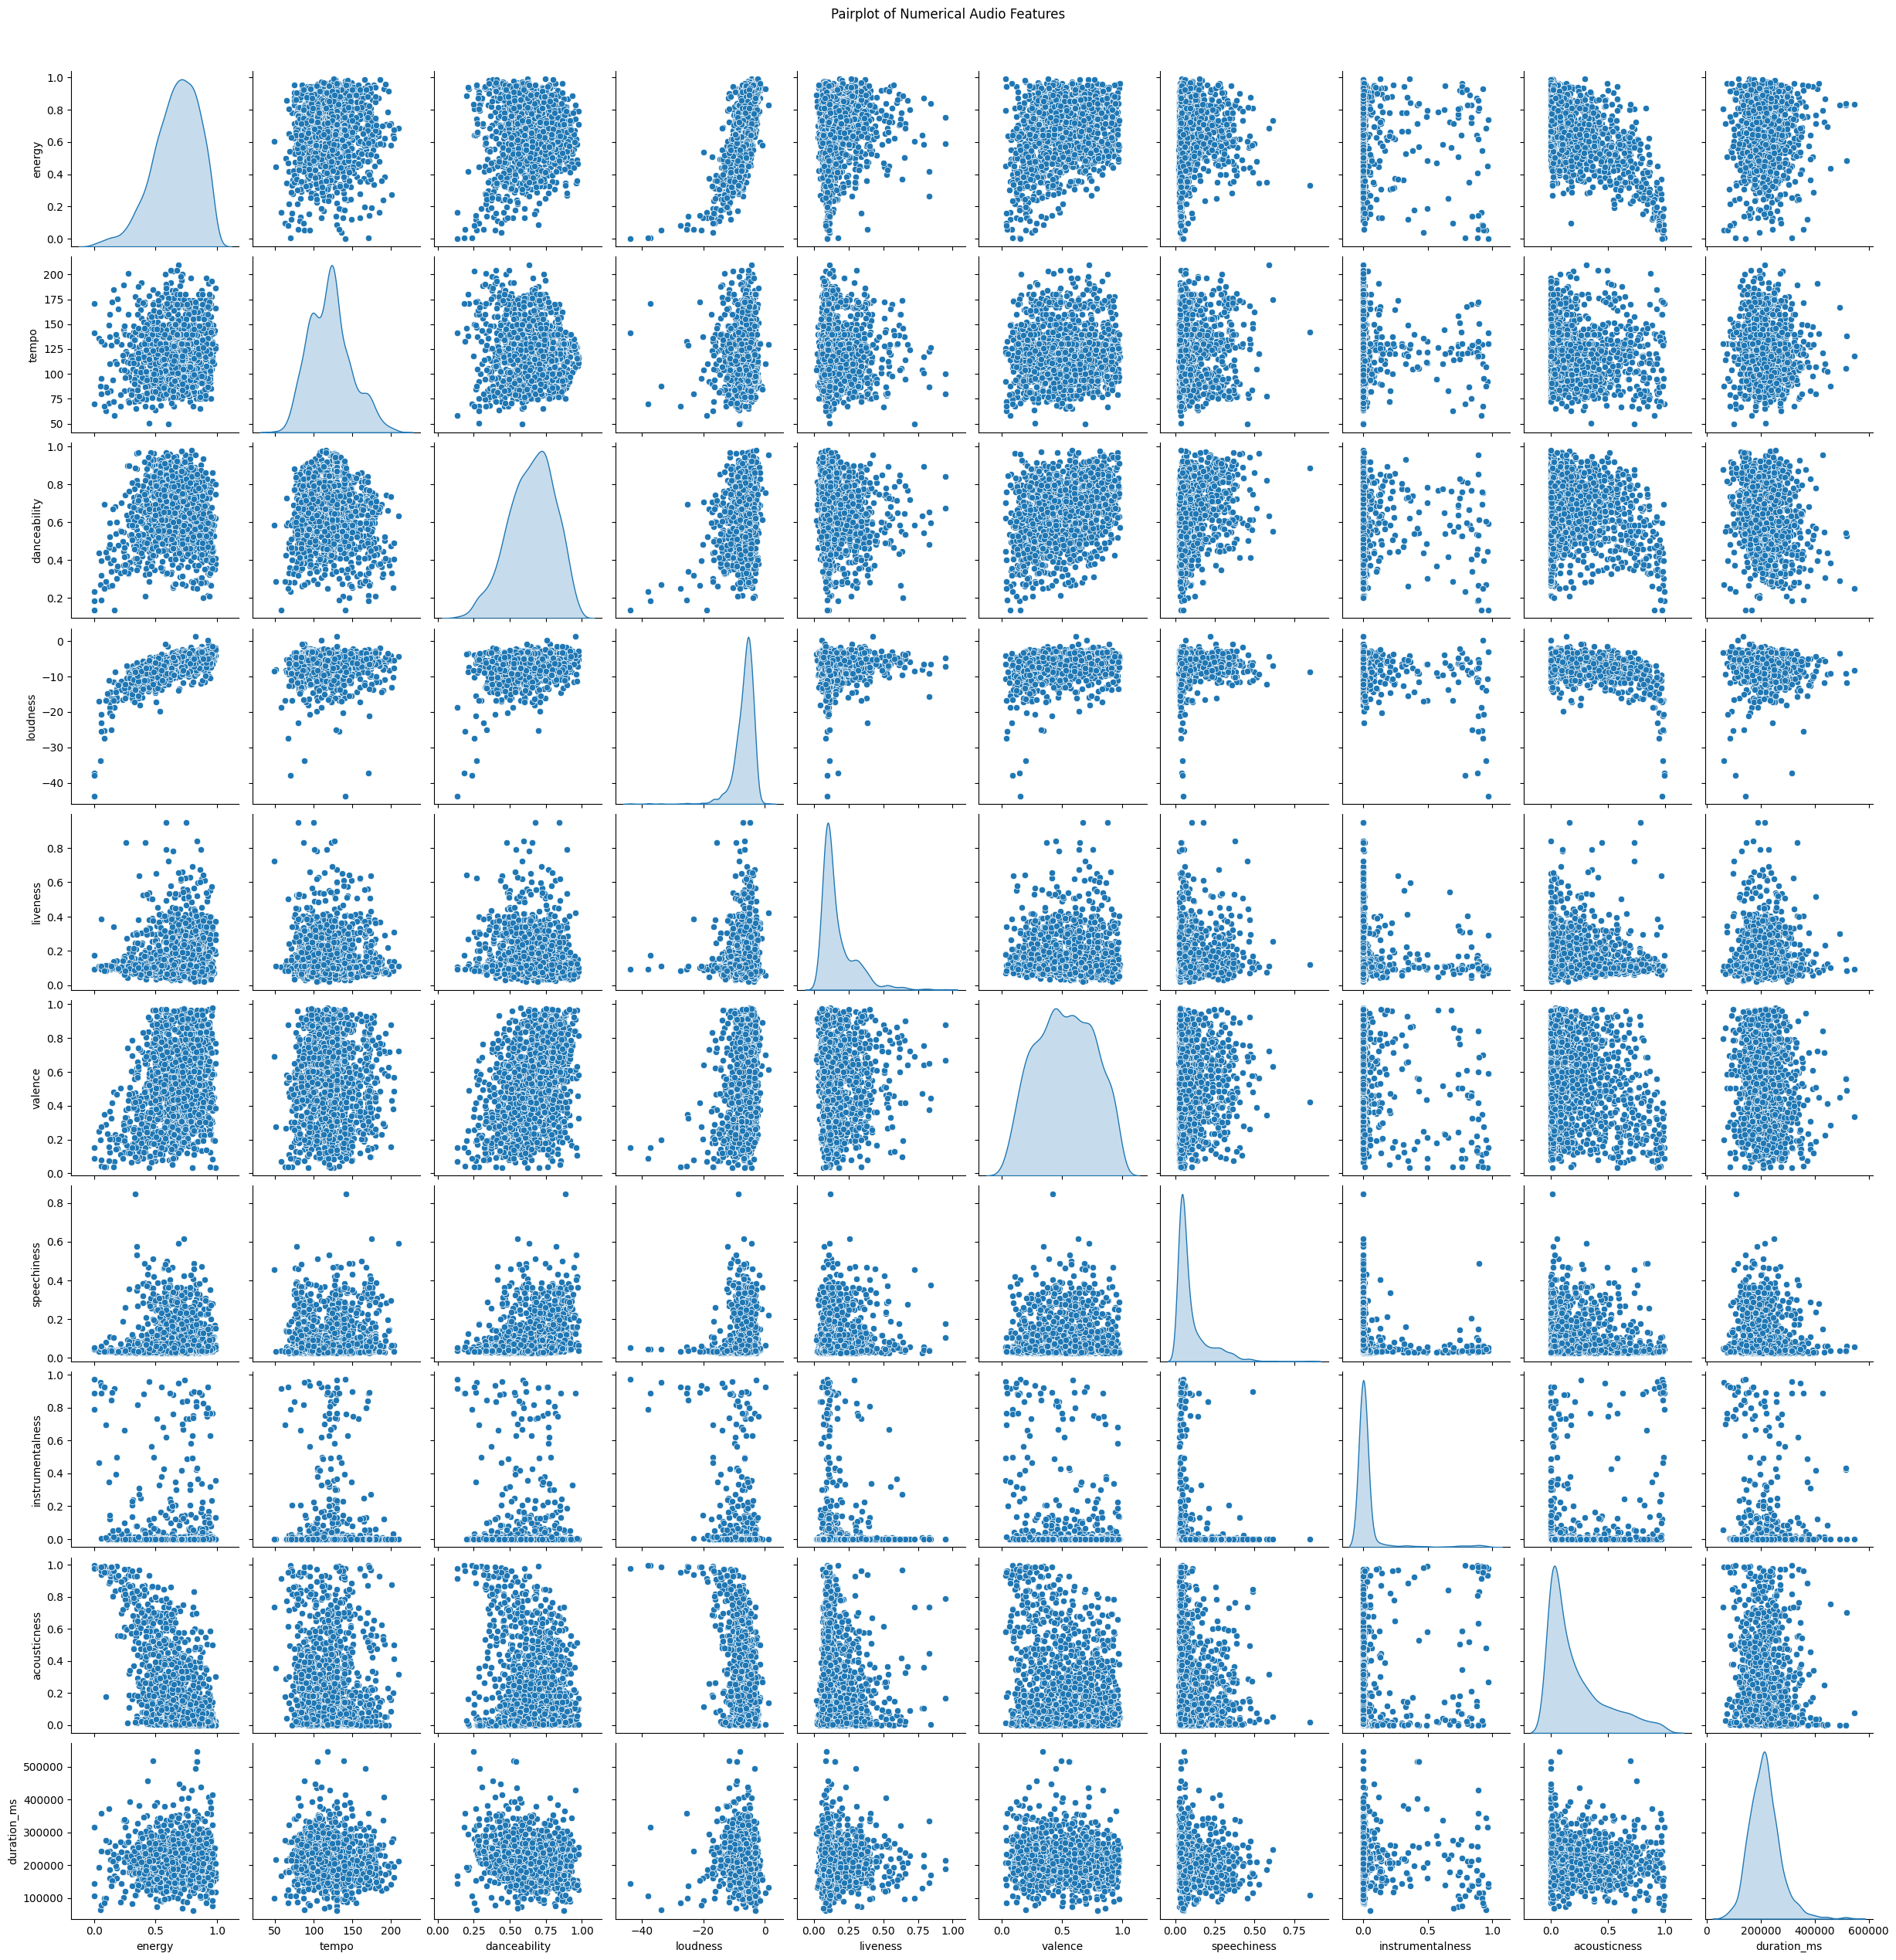

In [23]:
# Import libraries
import seaborn as sns

# Select numerical audio features
audio_features = ['energy', 'tempo', 'danceability', 'loudness', 'liveness',
                  'valence', 'speechiness', 'instrumentalness', 'acousticness', 'duration_ms']
numerical_df = df[audio_features]

# Pairplot of numerical features
sns.pairplot(numerical_df, diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Numerical Audio Features", y=1.02)
plt.show()


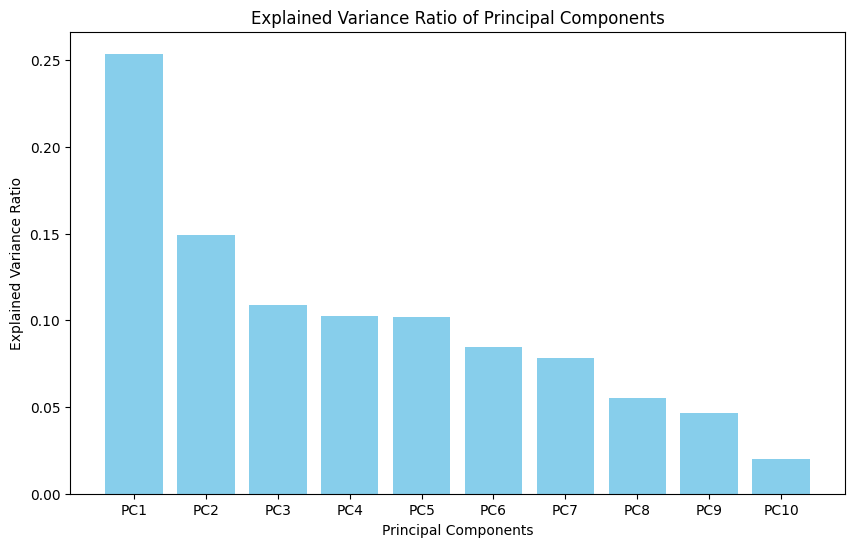

Cumulative Explained Variance: [0.25370515 0.40283475 0.51175919 0.61417805 0.71587482 0.80059682
 0.87857008 0.93391538 0.9802647  1.        ]
PCA Components:
        energy     tempo  danceability  loudness  liveness   valence  \
PC1   0.518557  0.086186      0.214263  0.527723  0.117707  0.317047   
PC2  -0.260374 -0.172875      0.614780 -0.062796 -0.122986  0.270386   
PC3  -0.004744  0.695299     -0.160235 -0.030787  0.249048 -0.279954   
PC4   0.188924 -0.103470     -0.019267 -0.073317  0.423750  0.277296   
PC5  -0.092092 -0.409293     -0.127503  0.048771  0.765419 -0.156287   
PC6   0.139322 -0.416728      0.130052  0.004785 -0.061433 -0.336351   
PC7  -0.072703  0.245841      0.112043 -0.319238  0.257778  0.576581   
PC8  -0.289474  0.195374      0.591941 -0.127071  0.259340 -0.340784   
PC9   0.118869  0.169186      0.315996  0.525884  0.077111 -0.202188   
PC10  0.704618  0.011108      0.232635 -0.560559 -0.011694 -0.209969   

      speechiness  instrumentalness  acousticne

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize numerical audio features
scaler = StandardScaler()
scaled_audio_features = scaler.fit_transform(numerical_df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_audio_features)

# Create a DataFrame for explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance Ratio'], color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Print cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Optional: View PCA components
pca_components_df = pd.DataFrame(pca.components_, columns=audio_features, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("PCA Components:")
print(pca_components_df)


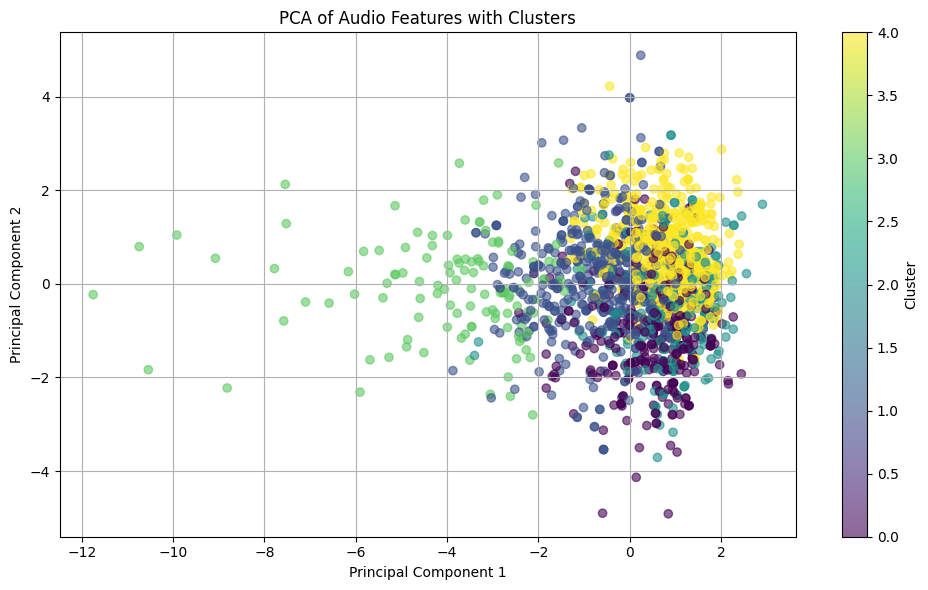

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the scaled features (assuming clustering has already been performed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_audio_features)  # 'scaled_audio_features' is the normalized feature set

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)  # 'clusters' is from KMeans or another clustering algorithm
plt.title('PCA of Audio Features with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from textblob import TextBlob

# Analyze sentiment
df['title_sentiment'] = df['track_name'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Compare sentiment groups
avg_popularity_by_sentiment = df.groupby(pd.cut(df['title_sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive']))['track_popularity'].mean()
print(avg_popularity_by_sentiment)


title_sentiment
Negative    74.839506
Neutral     75.715729
Positive    76.905660
Name: track_popularity, dtype: float64


<ipython-input-26-0300bfbb81fa>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_sentiment = df.groupby(pd.cut(df['title_sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive']))['track_popularity'].mean()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeem2oi5t/klzgp8er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeem2oi5t/g0ri7loa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42569', 'data', 'file=/tmp/tmpeem2oi5t/klzgp8er.json', 'init=/tmp/tmpeem2oi5t/g0ri7loa.json', 'output', 'file=/tmp/tmpeem2oi5t/prophet_modela5iycfky/prophet_model-20250115095134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

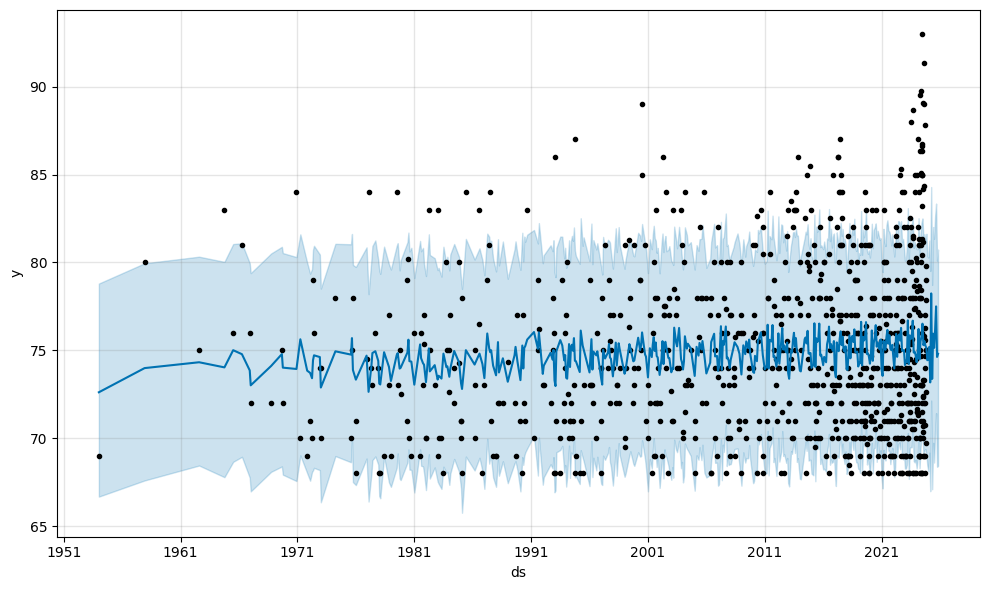

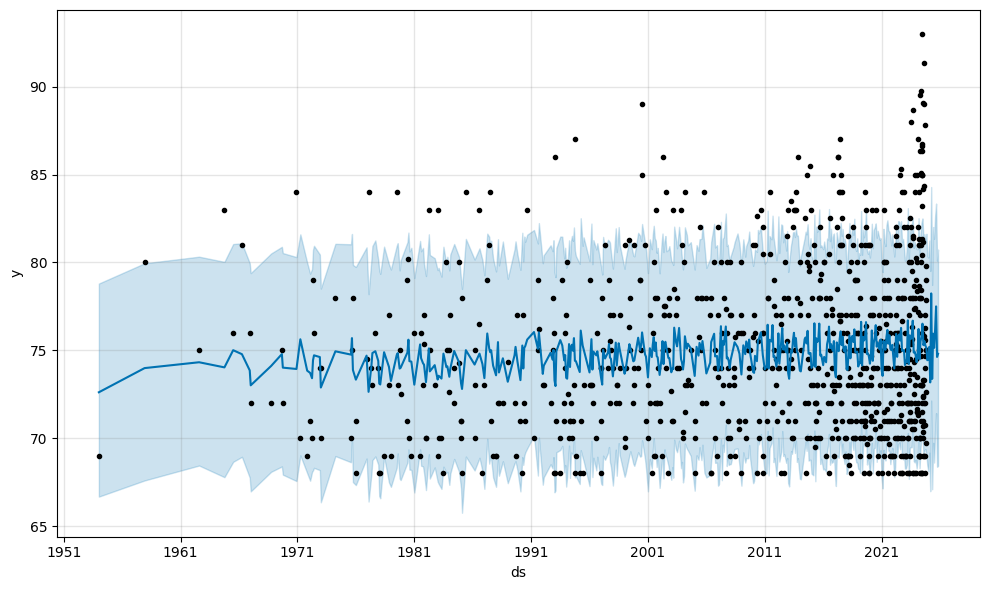

In [28]:
from prophet import Prophet

# Prepare data for Prophet
genre_data = df.groupby(['year_month', 'playlist_genre'])['track_popularity'].mean().reset_index()
genre_data.rename(columns={'year_month': 'ds', 'track_popularity': 'y'}, inplace=True)

# Convert 'ds' column to datetime before fitting Prophet
genre_data['ds'] = genre_data['ds'].dt.to_timestamp()  # Convert to Timestamp

# Fit Prophet model
model = Prophet()
model.fit(genre_data)
forecast = model.predict(model.make_future_dataframe(periods=12, freq='M'))
model.plot(forecast)